In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro 

# Load your features and labels
samples = np.load(r'D:\Downloads Folder\activation_maps_lines_image52_pixel.npy')
features = np.load(r'D:\Downloads Folder\activation_maps_lines_image52_labelpixel.npy')

print("The shape ",samples.shape,features.shape)
# Reshape your data into a 2D format (pixels x features)
num_samples = samples.shape[0]   # Total number of pixels
num_features = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(num_samples,num_features)
y_reshaped = features.reshape(num_samples)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)

The shape  (16384, 13) (16384, 1)
(16384, 13) (16384,)


In [2]:
samples = pd.DataFrame(samples,columns=np.arange(0,13))
samples['13']=features # Adding features coulmn into the samples dataset 
samples.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB


In [3]:
# A1 Question:
#Finding the class mean and centroid values
samples_1=samples.loc[samples['13']==0,samples.columns[0:13]]
sample_1_mean=samples_1.mean()
print("The mean value of class 1: \n",sample_1_mean)
samples_2=samples.loc[samples['13']==255,samples.columns[0:13]]
sample_2_mean=samples_2.mean()
print("The mean value of class 2: \n",sample_2_mean)


The mean value of class 1: 
 0     0.008116
1     0.005523
2     0.003076
3     0.001685
4     0.001473
5     0.000794
6     0.013855
7     0.000353
8     0.000044
9     0.000000
10    0.000589
11    0.000234
12    0.074462
dtype: float64
The mean value of class 2: 
 0     0.008098
1     0.005399
2     0.003150
3     0.001754
4     0.001539
5     0.000888
6     0.018550
7     0.000394
8     0.000070
9     0.000000
10    0.000592
11    0.000250
12    0.074482
dtype: float64


In [4]:
#Finding the intra class spread
samples_1_spread=samples_1.var()
samples_2_spread=samples_2.var()
print("The intra class spread of samples_1 is:\n",samples_1_spread)
print("The intra class spread of samples_2 is:\n",samples_2_spread)

The intra class spread of samples_1 is:
 0     1.355777e-04
1     3.992622e-05
2     2.644357e-05
3     9.155051e-06
4     4.696421e-06
5     2.523579e-06
6     6.706456e-03
7     1.268224e-06
8     1.717706e-07
9     0.000000e+00
10    2.657077e-06
11    9.374027e-07
12    1.848212e-07
dtype: float64
The intra class spread of samples_2 is:
 0     1.663116e-04
1     4.558561e-05
2     2.944346e-05
3     9.979397e-06
4     4.764009e-06
5     2.757595e-06
6     9.053697e-03
7     1.393303e-06
8     2.692791e-07
9     0.000000e+00
10    2.585235e-06
11    9.986960e-07
12    1.075499e-07
dtype: float64


In [5]:
#Finding the inter class distance
inter_distance = np.linalg.norm(sample_1_mean - sample_2_mean)
print("The inter class distance between centroids of samples_1 and sample_2 is:\n",inter_distance)

The inter class distance between centroids of samples_1 and sample_2 is:
 0.004699315708851366


The feature taken is: 
 0        0.000000
1        0.000000
2        0.000000
3        0.003922
4        0.000000
           ...   
16379    0.003922
16380    0.000000
16381    0.000000
16382    0.000000
16383    0.000000
Name: 5, Length: 16384, dtype: float64
The mean value of samples[5] is:
 0.0008566463694852912
The varinance of samples[5] is :
 2.6745271173934785e-06


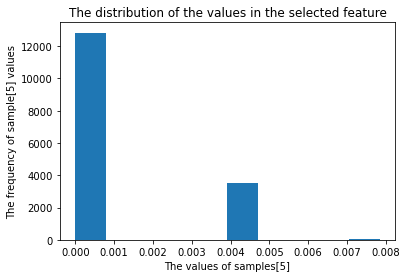

In [6]:
#A2 Question
#Density pattern for a feature
feature = samples.loc[:,5]
print("The feature taken is: \n",feature)
plt.hist(feature)
plt.xlabel('The values of samples[5]')
plt.ylabel('The frequency of sample[5] values')
plt.title('The distribution of the values in the selected feature')
feature_mean = feature.mean()
feature_variance = feature.var()
print("The mean value of samples[5] is:\n",feature_mean)
print("The varinance of samples[5] is :\n",feature_variance)

In [7]:
#A3 Question
#Find the minkowski distance between two feature vectors
from math import *
from decimal import Decimal

#Function to find the root value
def a_root(value, root):
    root_value = 1/float(root)
    return round(Decimal(value) ** Decimal(root_value), 3)

#Function for The minkowski distance
def minkowski_distance(x,y,a_value):
    return (a_root(sum(pow(abs(a-b), a_value)for a,b in zip(x,y)), a_value))

feature_vector_1 = samples.iloc[345,:]
feature_vector_2 = samples.iloc[486,:]

# Finding the minkowski distance of r value 1
minkowski_distance_1 = minkowski_distance(feature_vector_1, feature_vector_2, 1)
print('The minkowski distance of r value 1 is: ', minkowski_distance_1, '\n')
# Finding the minkowski distance of r value 2
minkowski_distance_2 = minkowski_distance(feature_vector_1, feature_vector_2, 2)
print('The minkowski distance of r value 2 is: ', minkowski_distance_2, '\n')
# Finding the minkowski distance of r value 3
minkowski_distance_3 = minkowski_distance(feature_vector_1, feature_vector_2, 3)
print('The minkowski distance of r value 3 is: ', minkowski_distance_3, '\n')
# Finding the minkowski distance of r value 4
minkowski_distance_4 = minkowski_distance(feature_vector_1, feature_vector_2, 4)
print('The minkowski distance of r value 4 is: ', minkowski_distance_4, '\n')
# Finding the minkowski distance of r value 5
minkowski_distance_5 = minkowski_distance(feature_vector_1, feature_vector_2, 5)
print('The minkowski distance of r value 5 is: ', minkowski_distance_5, '\n')
# Finding the minkowski distance of r value 6
minkowski_distance_6 = minkowski_distance(feature_vector_1, feature_vector_2, 6)
print('The minkowski distance of r value 6 is: ', minkowski_distance_6, '\n')
# Finding the minkowski distance of r value 7
minkowski_distance_7 = minkowski_distance(feature_vector_1, feature_vector_2, 7)
print('The minkowski distance of r value 7 is: ', minkowski_distance_7, '\n')
# Finding the minkowski distance of r value 8
minkowski_distance_8 = minkowski_distance(feature_vector_1, feature_vector_2, 8)
print('The minkowski distance of r value 8 is: ', minkowski_distance_8, '\n')
# Finding the minkowski distance of r value 9
minkowski_distance_9 = minkowski_distance(feature_vector_1, feature_vector_2, 9)
print('The minkowski distance of r value 9 is: ', minkowski_distance_9, '\n')
# Finding the minkowski distance of r value 10
minkowski_distance_10 = minkowski_distance(feature_vector_1, feature_vector_2, 10)
print('The minkowski distance of r value 10 is: ', minkowski_distance_10, '\n')


The minkowski distance of r value 1 is:  0.039 

The minkowski distance of r value 2 is:  0.019 

The minkowski distance of r value 3 is:  0.017 

The minkowski distance of r value 4 is:  0.016 

The minkowski distance of r value 5 is:  0.016 

The minkowski distance of r value 6 is:  0.016 

The minkowski distance of r value 7 is:  0.016 

The minkowski distance of r value 8 is:  0.016 

The minkowski distance of r value 9 is:  0.016 

The minkowski distance of r value 10 is:  0.016 



Text(0.5, 1.0, 'The distribution of the values for the minkowski distance')

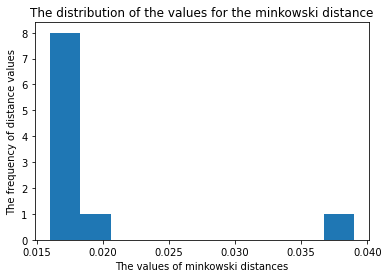

In [8]:
plot_values = [minkowski_distance_1,minkowski_distance_2,minkowski_distance_3,minkowski_distance_4,minkowski_distance_5,minkowski_distance_6,minkowski_distance_7,minkowski_distance_8,minkowski_distance_9,minkowski_distance_10]
plt.hist(plot_values)
plt.xlabel('The values of minkowski distances')
plt.ylabel('The frequency of distance values')
plt.title('The distribution of the values for the minkowski distance')

In [9]:
#A4 Question
#Breaking the data set into training set and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

In [49]:
#A5 Question:
#Apply the KNN classifier
from sklearn.neighbors import KNeighborsClassifier as knn
classify = knn(n_neighbors = 3)
classify.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
#A6 Question
#Testing the accuracy of kNN classifier
print(classify.score(X_test,y_test))

0.4220323466585291


In [12]:
#A7 Question
#Predicting the behavior of the test cases
predict_k3 = classify.predict(X_test)
print(predict_k3)

[255   0 255 ...   0   1   0]


[0.41867561794324076, 0.34543790051876716, 0.4220323466585291, 0.4156240463838877, 0.43698504729935916, 0.45437900518767166, 0.4610924626182484, 0.46963686298443696, 0.48519987793713765, 0.4827586206896552]


Text(0.5, 0, 'The k value for kNN classification')

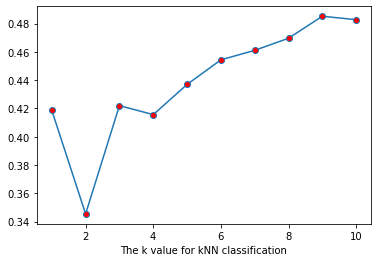

In [13]:
#A8 Question
#Checking thr kNN classifiers from k=1 to 11 finding their accuracies
from sklearn.metrics import accuracy_score
accuracy_test = []
for i in range(1,11):
    KNN = knn(n_neighbors = i)
    KNN.fit(X_train,y_train)
    predict = KNN.predict(X_test)
    accuracy_test.append(accuracy_score(predict,y_test))
print(accuracy_test)
plt.plot(np.arange(1,11), accuracy_test, marker = 'o', mfc = 'red')
plt.xlabel("The k value for kNN classification")
    

In [17]:
#A9 Question
#Confusion matrix and calcuating the precision, recall and f_1 score
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predict_k3, y_test))

[[366  58 152 714]
 [ 20   6  12  42]
 [ 47   6  19  91]
 [503  56 193 992]]


In [18]:
print(classification_report(predict_k3,y_test))

              precision    recall  f1-score   support

           0       0.39      0.28      0.33      1290
           1       0.05      0.07      0.06        80
         128       0.05      0.12      0.07       163
         255       0.54      0.57      0.55      1744

    accuracy                           0.42      3277
   macro avg       0.26      0.26      0.25      3277
weighted avg       0.44      0.42      0.43      3277



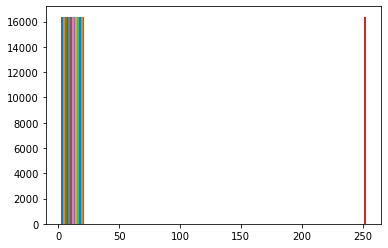

In [19]:
plt.hist(samples.loc[samples['13']])
plt.show()

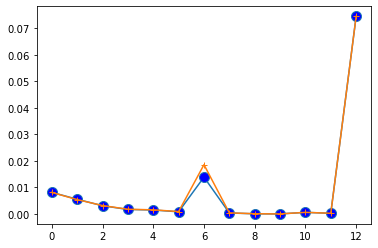

In [28]:
plt.plot(sample_1_mean, marker='o', ms=10, mfc='blue')
plt.plot(sample_2_mean, marker='+', mfc='red')
plt.show()